# 星下点轨迹生成

输入六个轨道根数，绘制出相应的星下点轨迹

In [1]:
#!/usr/bin/python
# -*- coding: UTF-8 -*-
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [3]:
bm = plt.imread("MAP.jpg")

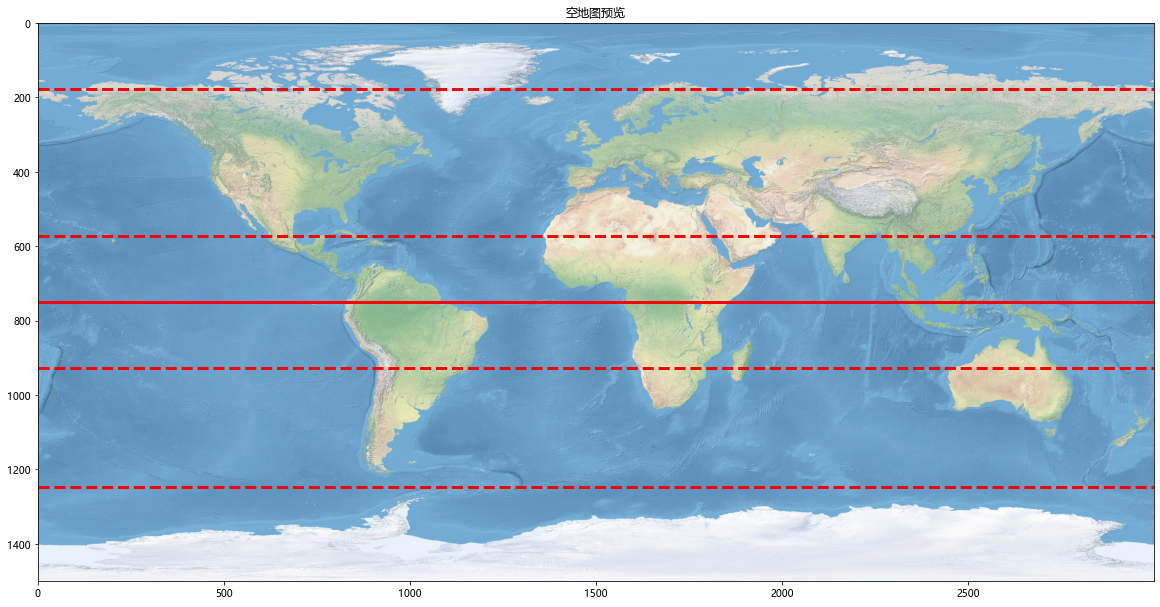

In [4]:
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20))
plt.imshow(bm)

#极圈，回归线以及赤道
plt.plot([0,2999],[177,177],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[573,573],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[750,750],c='red',linewidth=3)
plt.plot([0,2999],[927,927],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[1248,1248],c='red',linewidth=3,linestyle="--")

plt.title("空地图预览")
plt.show()

## 特殊情况：圆轨的星下点计算

In [5]:
k = 3.9861e14 #开普勒常数
we = 7.292e-5 #地球自转角速度

In [6]:
#42164169
a = 42164169 #半长轴
i = 45 / 180 * np.pi #倾角
theta0 = 0/180 * np.pi #初始真近点角
omega = 100/180 * np.pi #初始升交点经度
total = 8640 #取样数量
step = 10 #取样间隔 秒
data = f"半长轴:{a}m 轨道倾角:{i}rad 初始真近点角:{theta0}rad 初始升交点经度:{omega}rad 采样间隔;{step}s 采样点:{total}个 "

In [7]:
#轨道周长
C = 2 * a * np.pi
#真近点角计算
theta = []
for t in range(0,total*step,step):
    temp  = theta0 + 2*np.pi*((k/a)**0.5 * t)/C
    theta.append((temp,t))

#维度计算
lat = []
for (tt,_) in theta:
    lat.append(np.arcsin(np.sin(i) * np.sin(tt)))

#经度计算
lon = []
for (tt,t) in theta:
    co = 0
    temp = tt % (2*np.pi)
    if temp > np.pi:
        temp = temp - 2*np.pi
    if temp < -0.5 * np.pi and temp > -1 * np.pi:
        co = -1* np.pi
    if temp > 0.5 * np.pi and temp < 1 * np.pi:
        co = 1*np.pi
    temp1 = np.arctan(np.cos(i)*np.tan(tt)) + omega - we*t + co
    temp1 = temp1 % (2*np.pi)
    lon.append(temp1)

In [8]:
#翻译纬度
ys = []
for y in lat:
    ys.append(750-750*(y*2/np.pi))

#翻译经度
xs = []
for x in lon:
    temp = x % (2*np.pi)
    if abs(temp) < np.pi:
        xs.append((temp/np.pi)*1500+1500)
        continue
    else:
        if x < 0:
            temp = 2*np.pi - temp
        else:
            temp = temp - 2*np.pi
        xs.append((temp/np.pi)*1500+1500)
        

参数: 半长轴:42164169m 轨道倾角:0.7853981633974483rad 初始真近点角:0.0rad 初始升交点经度:1.7453292519943295rad 采样间隔;10s 采样点:8640个 


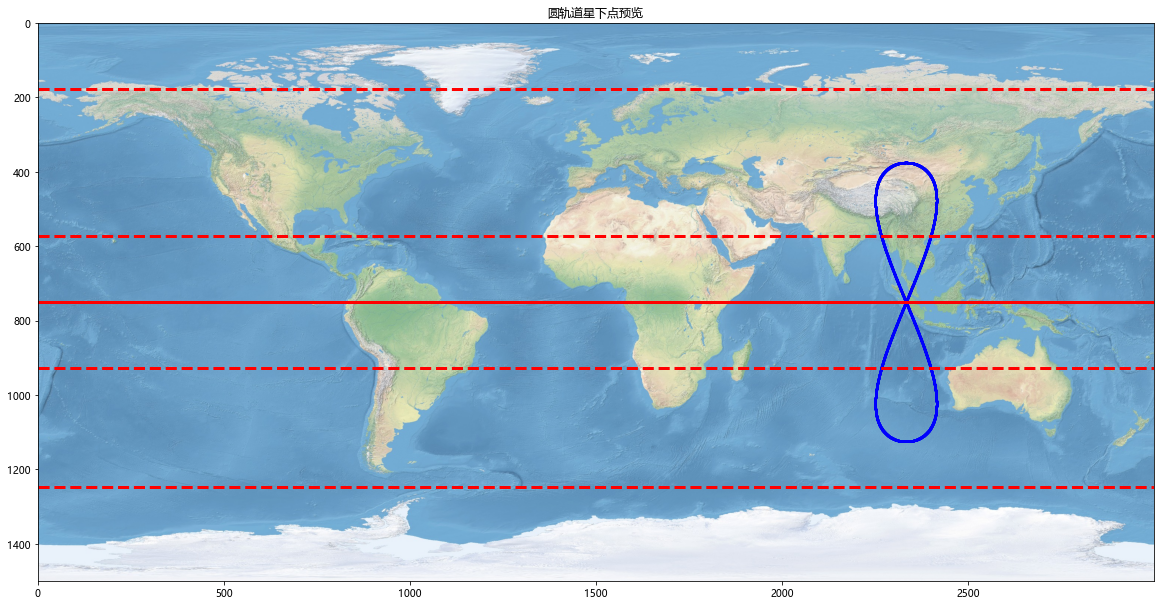

In [9]:
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20))
plt.imshow(bm)

#极圈，回归线以及赤道
plt.plot([0,2999],[177,177],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[573,573],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[750,750],c='red',linewidth=3)
plt.plot([0,2999],[927,927],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[1248,1248],c='red',linewidth=3,linestyle="--")


plt.scatter(xs,ys,c='blue',s=1)

plt.title("圆轨道星下点预览")
print(f"参数: {data}")
plt.show()

## 一般情况：椭圆轨道的星下点计算

In [10]:
pi = np.pi
sin = np.sin
cos = np.cos
tan = np.tan

In [11]:
k = 3.9861e14 #地球引力常数
we = 7.292e-5 #地球自转角速度

In [34]:
#轨道参数 Degree
a = 16763533 #半长轴
i = 25 / 180 * pi #倾角
e = 0.4 #偏心率
Omega = -0 / 180 * pi #升交点经度
omega  = -10 / 180 * pi #近拱点角距

#模拟参数
total = 864 #模拟数据点总量
step = 100 #模拟数据点间隔 秒
epsilon = 0.0001 #牛顿迭代精度

data = f"半长轴 {a}m 倾角 {i}rad 离心率 {e} 升交点经度 {Omega}rad 进拱点角距 {omega}rad 数据点总量 {total} 点间隔 {step}"

In [35]:
#平均角速度n
n = 1/((a**3/k)**0.5)
theta = []
xs,ys = [],[]
for t in range(0,step*total,step):
    #平近点角M
    M = n*t
    #牛顿迭代法解偏近点角E
    E0 = M
    E1 = M+1
    temp = E0
    while abs(E1-E0) > epsilon:
        E0 = temp
        E1 = E0 - (E0-M-e*sin(E0))/(1-e*cos(E0))
        temp = E1
    E = E1
    #真近角theta
    theta.append((2*np.arctan(((1+e)/(1-e))**0.5 * tan(E/2)),t))
    

In [36]:
#维度计算
lat = []
for (tt,_) in theta:
    lat.append(np.arcsin(np.sin(i) * np.sin(tt)))

#经度计算
lon = []
for (tt,t) in theta:
    co = 0
    temp = (tt+omega) % (2*np.pi)
    if temp > np.pi:
        temp = temp - 2*np.pi
    if temp < -0.5 * np.pi and temp > -1 * np.pi:
        co = -1* np.pi
    if temp > 0.5 * np.pi and temp < 1 * np.pi:
        co = 1*np.pi
    temp1 = np.arctan(np.cos(i)*np.tan(tt+omega)) + Omega - we*t + co
    temp1 = temp1 % (2*np.pi)
    lon.append(temp1)

In [37]:
#翻译纬度
ys = []
for y in lat:
    ys.append(750-750*(y*2/np.pi))

#翻译经度
xs = []
for x in lon:
    temp = x % (2*np.pi)
    if abs(temp) < np.pi:
        xs.append((temp/np.pi)*1500+1500)
        continue
    else:
        if x < 0:
            temp = 2*np.pi - temp
        else:
            temp = temp - 2*np.pi
        xs.append((temp/np.pi)*1500+1500)
        

参数: 半长轴 16763533m 倾角 0.4363323129985824rad 离心率 0.4 升交点经度 0.0rad 进拱点角距 -0.17453292519943295rad 数据点总量 864 点间隔 100


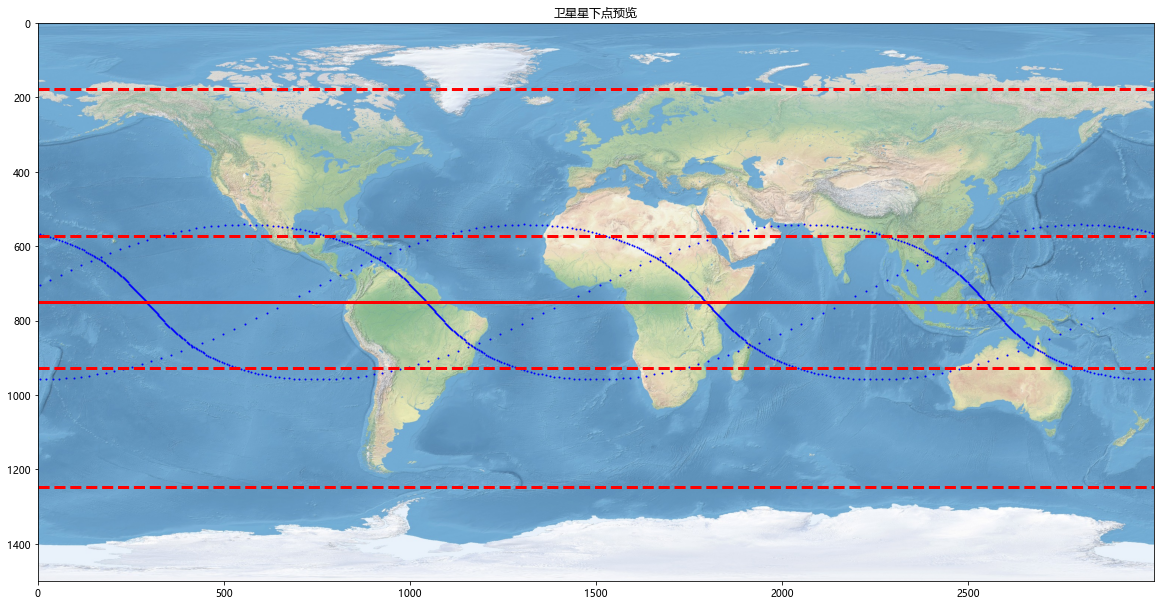

直观数据 近地点 3687119.799999999m 远地点 17097946.2m 周期 21600.0175527251s 0.25000020315654053day


In [38]:
plt.rcParams['font.sans-serif']=['Microsoft Yahei']
plt.rcParams['axes.unicode_minus']=False
plt.figure(figsize=(20,20))
plt.imshow(bm)

#极圈，回归线以及赤道
plt.plot([0,2999],[177,177],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[573,573],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[750,750],c='red',linewidth=3)
plt.plot([0,2999],[927,927],c='red',linewidth=3,linestyle="--")
plt.plot([0,2999],[1248,1248],c='red',linewidth=3,linestyle="--")


plt.scatter(xs,ys,c='blue',s=1)

plt.title("卫星星下点预览")
print(f"参数: {data}")
plt.show()
print(f"直观数据 近地点 {a*(1-e) - 6371000}m 远地点 {a*(1+e) - 6371000}m 周期 {2*pi*(a**3/k)**0.5}s {(2*pi*(a**3/k)**0.5)/86400}day")